In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_excel('TümörVerisi.xlsx')
df.columns = ['ID','Yarıçap','Hacim','Bağ Dokusu','Diferansiasyon Hızı','Etiket']
df.head()

,ID,Yarıçap,Hacim,Bağ Dokusu,Diferansiasyon Hızı,Etiket
0,1,102.0,4.441814e+06,1,0.229958,1
1,2,79.0,2.063676e+06,0,12.757216,1
2,3,8.0,2.143569e+03,1,8.317290,0
3,4,46.0,4.074118e+05,1,6.818729,1
4,5,18.0,2.441131e+04,1,2.802301,0


In [61]:
df['Etiket'].value_counts()

1    116
0     84
Name: Etiket, dtype: int64

In [62]:
# df.dropna(inplace=True)
df[df.isna().any(axis=1)]

,ID,Yarıçap,Hacim,Bağ Dokusu,Diferansiasyon Hızı,Etiket
14,15,NaN,5.552275e+05,1,7.352659,1
36,37,NaN,3.259293e+06,0,9.444319,0
80,81,NaN,5.127566e+06,1,13.075242,1
84,85,2.0,NaN,1,14.698404,0
111,112,90.0,NaN,0,3.016146,0
113,114,NaN,4.628983e+05,1,8.095673,1
128,129,109.0,NaN,0,8.721160,0
143,144,5.0,NaN,1,4.274438,0
149,150,NaN,7.356713e+04,1,2.315844,0


In [73]:
df_pivot = df.pivot_table(index='Etiket',columns='Bağ Dokusu', aggfunc={'Hacim':'mean','Yarıçap':'mean','Diferansiasyon Hızı':'mean'})
df_pivot

Diferansiasyon Hızı                   Hacim                \
Bağ Dokusu                   0         1             0             1   
Etiket                                                                 
0                     4.706897  5.045072  1.622751e+06  2.771050e+05   
1                    12.186677  7.867046  2.285563e+06  2.531343e+06   

              Yarıçap             
Bağ Dokusu          0          1  
Etiket                            
0           56.535714  23.750000  
1           70.642857  73.068182

In [70]:
df['Yarıçap'] = df.groupby(['Etiket','Bağ Dokusu'])['Yarıçap'].apply(lambda x: x.fillna(x.median()))
df['Hacim'] = df.groupby(['Etiket','Bağ Dokusu'])['Hacim'].apply(lambda x: x.fillna(x.median()))

In [71]:
df_pivot

Diferansiasyon Hızı                   Hacim                \
Bağ Dokusu                   0         1             0             1   
Etiket                                                                 
0                     4.706897  5.045072  1.662075e+06  2.933899e+05   
1                    12.186677  7.867046  2.285563e+06  2.531343e+06   

              Yarıçap             
Bağ Dokusu          0          1  
Etiket                            
0           56.581818  23.851852  
1           70.642857  73.035294

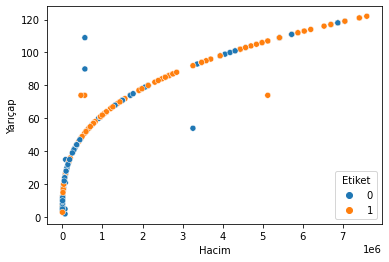

In [72]:
sns.scatterplot(data=df, x='Hacim', y='Yarıçap', hue='Etiket')
plt.show()

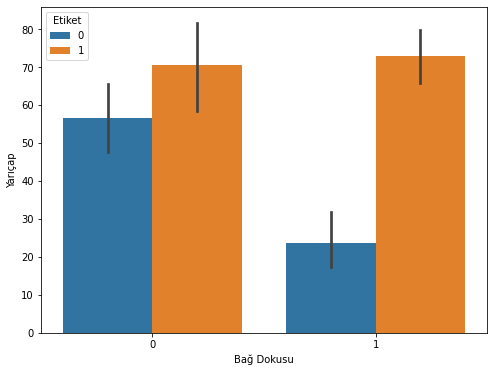

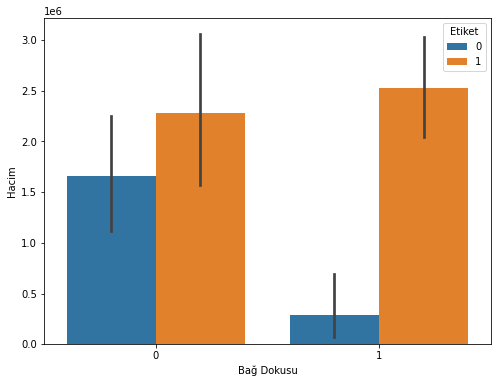

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Bağ Dokusu', y='Yarıçap', hue='Etiket')
plt.show()
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Bağ Dokusu', y='Hacim', hue='Etiket')
plt.show()

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

x = df.drop(['Etiket','ID'],axis=1)
y = df['Etiket']

x = pd.DataFrame(x, columns=df.columns[1:-1])

rf = tree.DecisionTreeClassifier()

SFS = SFS(rf, k_features=4, scoring='accuracy')
SFS.fit(x, y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=4,
                          scoring='accuracy')

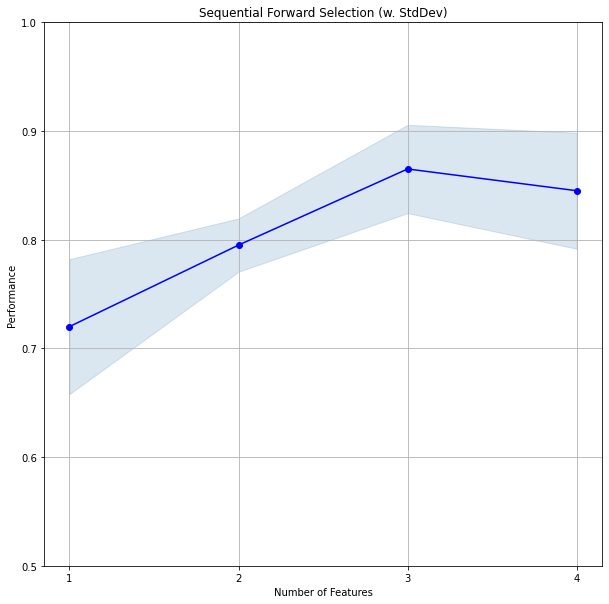

In [53]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(SFS.get_metric_dict(), kind='std_dev', figsize=(10,10))

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

In [54]:
SFS.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.625, 0.8  , 0.675, 0.75 , 0.75 ]),
  'avg_score': 0.72,
  'feature_names': ('Bağ Dokusu',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.8  , 0.825, 0.8  , 0.75 , 0.8  ]),
  'avg_score': 0.7949999999999999,
  'feature_names': ('Bağ Dokusu', 'Diferansiasyon Hızı')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.825, 0.925, 0.85 , 0.9  , 0.825]),
  'avg_score': 0.865,
  'feature_names': ('Hacim', 'Bağ Dokusu', 'Diferansiasyon Hızı')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.8  , 0.925, 0.775, 0.875, 0.85 ]),
  'avg_score': 0.845,
  'feature_names': ('Yarıçap', 'Hacim', 'Bağ Dokusu', 'Diferansiasyon Hızı')}}

|--- feature_3 <= 9.75
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1
|--- feature_3 >  9.75
|   |--- feature_0 <= 2.50
|   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- class: 1



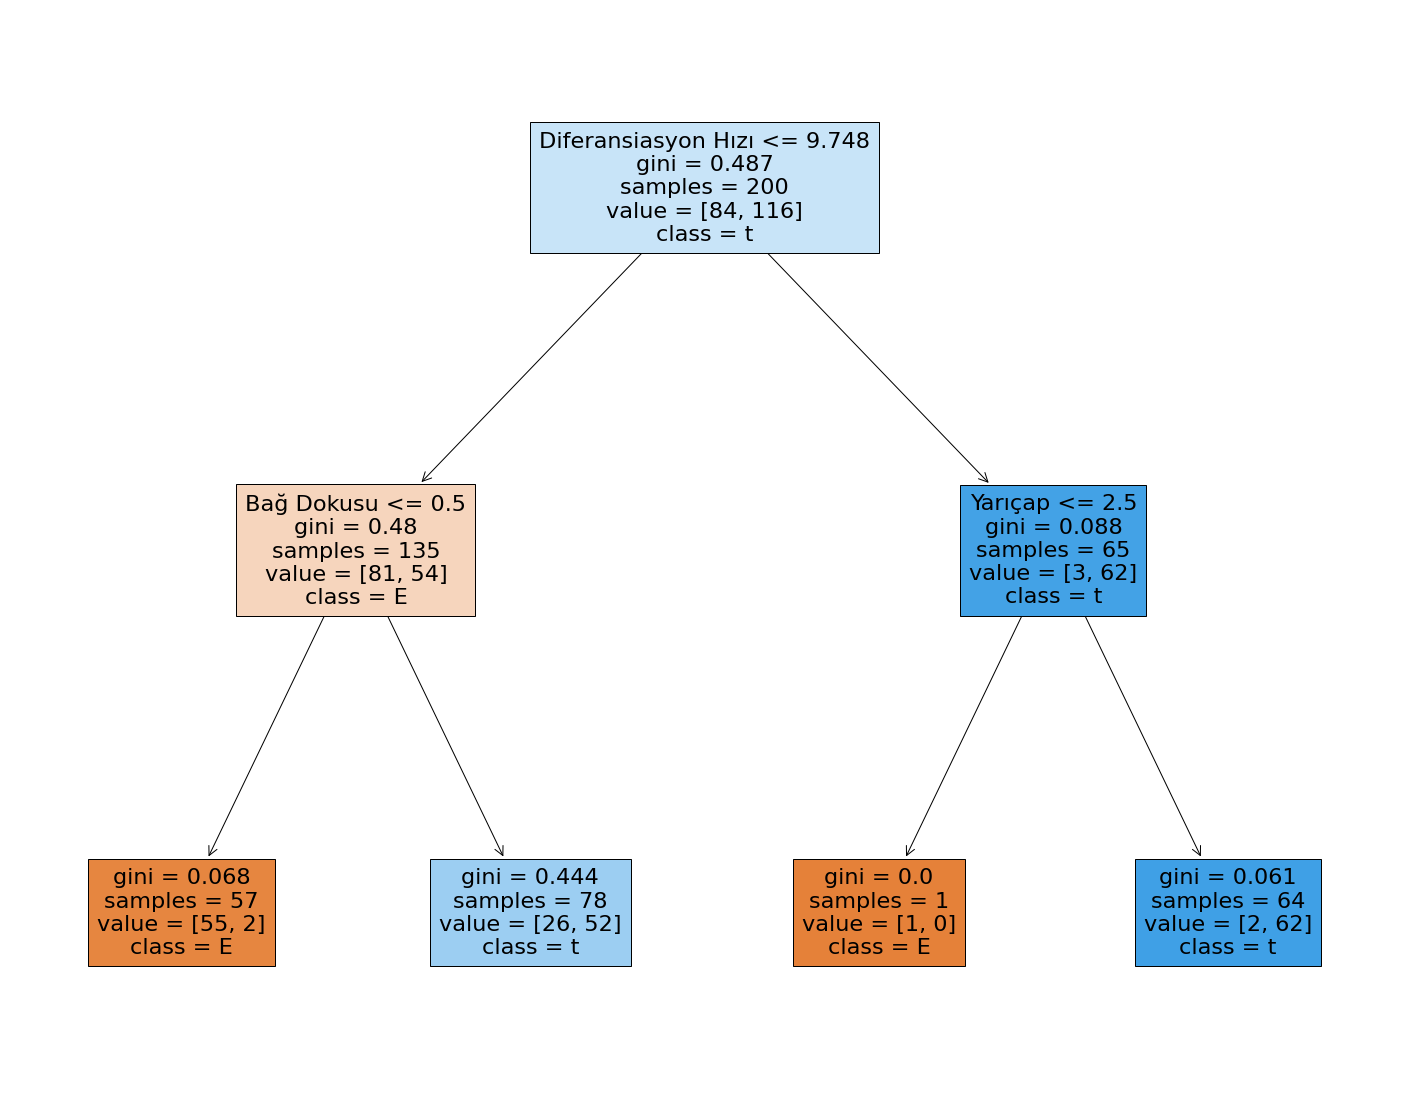

In [55]:
df['Bağ Dokusu'] = df['Bağ Dokusu'].astype('category')

x = df.drop(['Etiket','ID'],axis=1)
y = df['Etiket']

clf = tree.DecisionTreeClassifier(random_state=1234, max_depth=2)
model = clf.fit(x, y)

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['Yarıçap','Hacim','Bağ Dokusu', 'Diferansiasyon Hızı'],  
                   class_names='Etiket',
                   filled=True)

In [56]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

x = df.drop(['Etiket','ID'],axis=1)
y = df['Etiket']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=df.columns[1:-1])

rf = RandomForestClassifier()

SFS = SFS(rf, k_features=4, scoring='accuracy')
SFS.fit(x, y)

SequentialFeatureSelector(estimator=RandomForestClassifier(), k_features=4,
                          scoring='accuracy')

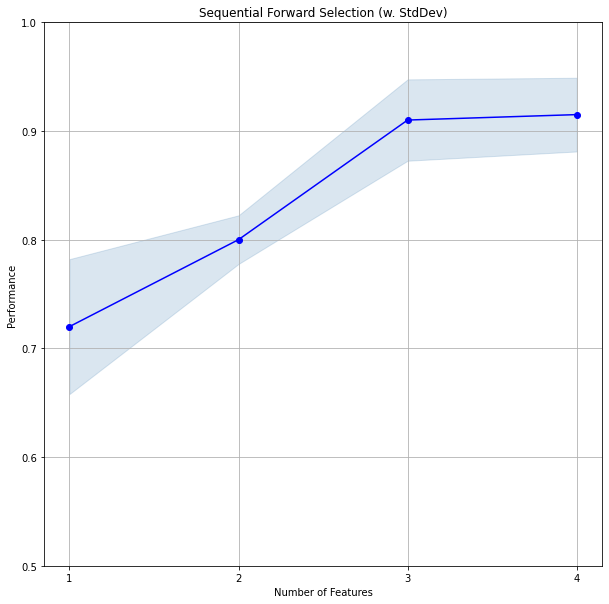

In [57]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(SFS.get_metric_dict(), kind='std_dev', figsize=(10,10))

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

In [58]:
SFS.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.625, 0.8  , 0.675, 0.75 , 0.75 ]),
  'avg_score': 0.72,
  'feature_names': ('Bağ Dokusu',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.8  , 0.825, 0.775, 0.775, 0.825]),
  'avg_score': 0.8,
  'feature_names': ('Bağ Dokusu', 'Diferansiasyon Hızı')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.85, 0.95, 0.9 , 0.95, 0.9 ]),
  'avg_score': 0.9099999999999999,
  'feature_names': ('Yarıçap', 'Bağ Dokusu', 'Diferansiasyon Hızı')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.85 , 0.925, 0.925, 0.95 , 0.925]),
  'avg_score': 0.915,
  'feature_names': ('Yarıçap', 'Hacim', 'Bağ Dokusu', 'Diferansiasyon Hızı')}}